In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_AE_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.0,1.0,1,2.0,1.0,3.0,1.0,1
1,5,4.0,4.0,5,7.0,10.0,3.0,2.0,1
2,3,1.0,1.0,1,2.0,2.0,3.0,1.0,1
3,6,8.0,8.0,1,3.0,4.0,3.0,7.0,1
4,4,1.0,1.0,3,2.0,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3,1.0,1.0,1,2.0,1.0,2.0,1.0,1
679,2,1.0,1.0,1,2.0,1.0,3.0,1.0,1
680,5,10.0,10.0,10,4.0,10.0,5.0,6.0,3
681,1,1.0,1.0,3,2.0,1.0,1.0,1.0,1


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	12
float64		column 3	15
int64		column 4	0
float64		column 5	3
float64		column 6	3
float64		column 7	18
float64		column 8	3
int64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,683.000000,671.000000,668.000000,683.000000,680.000000,680.000000,665.000000,680.000000,683.000000
mean,4.442167,3.113264,3.220060,2.830161,3.236765,3.538235,3.424060,2.864706,1.603221
std,2.820761,3.041355,2.982872,2.864562,2.226789,3.642129,2.434199,3.045447,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.500000,5.000000,4.000000,4.000000,6.000000,4.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

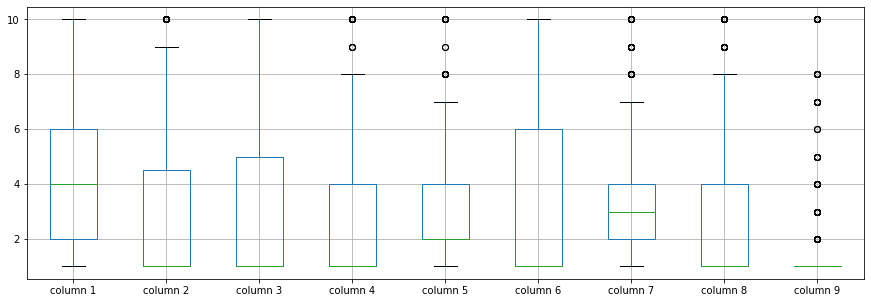

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.442167
column 2    3.113264
column 3    3.220060
column 4    2.830161
column 5    3.236765
column 6    3.538235
column 7    3.424060
column 8    2.864706
column 9    1.603221
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.640312,0.649520,0.487829,0.522997,0.591941,0.547955,0.535359,0.350957
column 2,0.640312,1.000000,0.908009,0.707827,0.752757,0.697994,0.754743,0.723315,0.461531
column 3,0.649520,0.908009,1.000000,0.683797,0.719216,0.715527,0.731312,0.709403,0.447084
column 4,0.487829,0.707827,0.683797,1.000000,0.595667,0.669334,0.665319,0.599238,0.418898
column 5,0.522997,0.752757,0.719216,0.595667,1.000000,0.583369,0.618496,0.628446,0.480579
column 6,0.591941,0.697994,0.715527,0.669334,0.583369,1.000000,0.685996,0.584271,0.333617
column 7,0.547955,0.754743,0.731312,0.665319,0.618496,0.685996,1.000000,0.657850,0.352595
column 8,0.535359,0.723315,0.709403,0.599238,0.628446,0.584271,0.657850,1.000000,0.436434
column 9,0.350957,0.461531,0.447084,0.418898,0.480579,0.333617,0.352595,0.436434,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+65,9+65+65,9+65+65,9+65+65+65+65,9+65+65+65,9+65+65,9+65,9], vae_layer = False, seed = 650)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 36.526224772135414
Epoch: 1 , loss: 36.43901529766264
Epoch: 2 , loss: 36.371857506888254
Epoch: 3 , loss: 35.42686403365362
Epoch: 4 , loss: 33.47130671001616
Epoch: 5 , loss: 31.760169982910156
Epoch: 6 , loss: 31.092288289751327
Epoch: 7 , loss: 30.2102385475522
Epoch: 8 , loss: 29.928239776974632
Epoch: 9 , loss: 28.896138827006023
Epoch: 10 , loss: 29.01237151736305
Epoch: 11 , loss: 28.42978813534691
Epoch: 12 , loss: 28.0524073555356
Epoch: 13 , loss: 27.81533395676386
Epoch: 14 , loss: 26.79911150251116
Epoch: 15 , loss: 26.765950657072523
Epoch: 16 , loss: 25.590986456189835
Epoch: 17 , loss: 25.751427150907972
Epoch: 18 , loss: 26.591920534769695
Epoch: 19 , loss: 25.10882309504918
Epoch: 20 , loss: 25.240946951366606
Epoch: 21 , loss: 25.604920182909286
Epoch: 22 , loss: 24.939772356124152
Epoch: 23 , loss: 25.126271747407458
Epoch: 24 , loss: 24.94100030263265
Epoch: 25 , loss: 25.4088436989

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
2,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
3,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
4,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
678,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
679,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
680,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
681,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(25.426350035400326, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.07582526679631342

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.0,1.0,1,2.0,1.0,3.0,1.0,1
1,5,4.0,4.0,5,7.0,10.0,3.0,2.0,1
2,3,1.0,1.0,1,2.0,2.0,3.0,1.0,1
3,6,8.0,8.0,1,3.0,4.0,3.0,7.0,1
4,4,1.0,1.0,3,2.0,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3,1.0,1.0,1,2.0,1.0,2.0,1.0,1
679,2,1.0,1.0,1,2.0,1.0,3.0,1.0,1
680,5,10.0,10.0,10,4.0,10.0,5.0,6.0,3
681,1,1.0,1.0,3,2.0,1.0,1.0,1.0,1


In [20]:
imputations[-1].to_excel("BCW_AE_1(imp).xlsx", index=False, header=False)